hello and welcome.
this is a very simple data set i used it to test my own algorithms.
another implementation is available __[here](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb)__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#local imports
import errors as e 
import models
import preprocessing as prc

In [2]:
df = pd.read_csv('/home/mahdi/w/pytest/schoolAdmit.csv')
df ['status'] = ['good' if a+b>100 else 'bad' for a,b in zip(df.score1,df.score2)]
df = df.reindex(columns = ['score1','score2','status','admitted'])

## data analysis

In [3]:
df.info()
print('\n\n',df.dtypes)
print(f'\n\ncolumns : {[col for col in df.columns]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score1    100 non-null    float64
 1   score2    100 non-null    float64
 2   status    100 non-null    object 
 3   admitted  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


 score1      float64
score2      float64
status       object
admitted      int64
dtype: object


columns : ['score1', 'score2', 'status', 'admitted']


In [4]:
print('first 3 : \n');print(df.head(3))
print()
print('last3 : \n');print(df.tail(3))

first 3 : 

      score1     score2 status  admitted
0  34.623660  78.024693   good         0
1  30.286711  43.894998    bad         0
2  35.847409  72.902198   good         0

last3 : 

       score1     score2 status  admitted
97  99.315009  68.775409   good         1
98  55.340018  64.931938   good         1
99  74.775893  89.529813   good         1


In [5]:
df.describe()

,score1,score2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
print(f'minimum score1 : {df.score1.min()}\n maximum score1 : {df.score1.max()}')
print('\n')
print(f'minimum score2 : {df.score2.min()}\n maximum score2 : {df.score2.max()}')

minimum score1 : 30.05882244669796
 maximum score1 : 99.82785779692128


minimum score2 : 30.60326323428011
 maximum score2 : 98.86943574220612


In [7]:
print(f'median : \n{df.median()}\n\n mean : \n{df.mean()}')

median : 
score1      67.032988
score2      67.682381
admitted     1.000000
dtype: float64

 mean : 
score1      65.644274
score2      66.221998
admitted     0.600000
dtype: float64


In [8]:
#checking if data does not consist missing values
df.isna().any()

score1      False
score2      False
status      False
admitted    False
dtype: bool

## visualization

1    60
0    40
Name: admitted, dtype: int64


/home/mahdi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


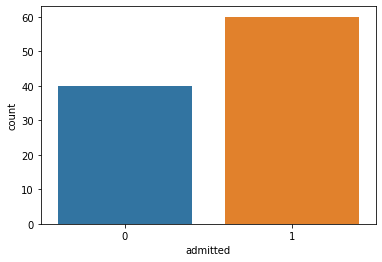

In [9]:
print(df['admitted'].value_counts())
sns.countplot(df.admitted);

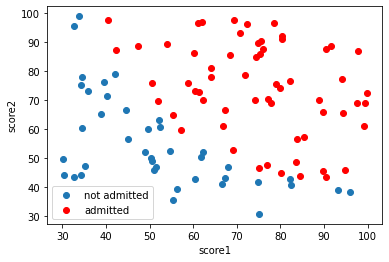

In [10]:
plt.scatter(df[df.admitted==0].score1,df[df.admitted==0].score2,label='not admitted');
plt.scatter(df[df.admitted==1].score1,df[df.admitted==1].score2,color='red',label='admitted');
plt.xlabel('score1');plt.ylabel('score2');plt.legend()

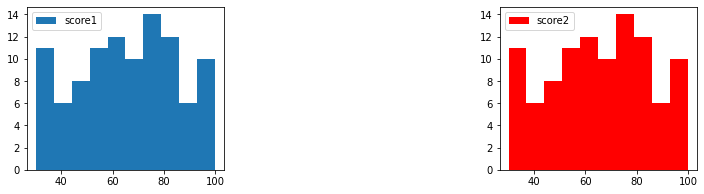

In [11]:
fig2 = plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
df.score1.hist(label='score1',grid=False);
plt.legend()
plt.subplot(1,3,3)
df.score1.hist(label='score2',color='r',grid=False);
plt.legend();

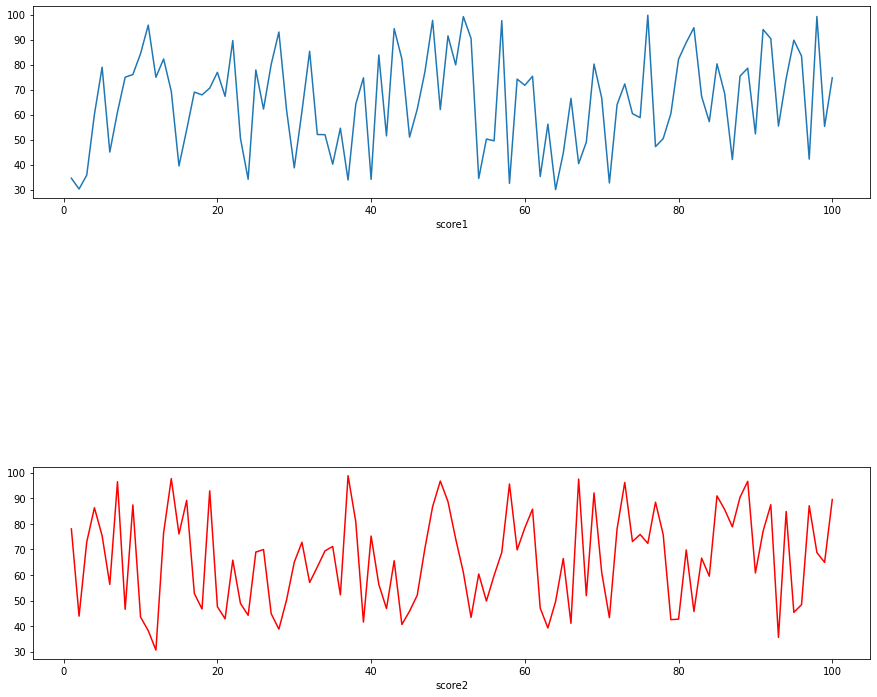

In [12]:
fig1 = plt.figure(figsize=(15,12))
s1 = pd.Series(df.score1)
s2 = pd.Series(df.score2)
plt.subplot(3,1,1)
plt.plot(np.linspace(1,100,100),s1) ; plt.xlabel('score1')
plt.subplot(3,1,3)
plt.plot(np.linspace(1,100,100),s2,color='red') ;plt.xlabel('score2');

## learn

In [13]:
x = np.asarray([s1,s2]).T
x = prc.normalize_input(x=x)
y = np.asarray(df.admitted).reshape(-1,1)
w0 = np.random.randn(x.shape[1]+1,1)
model = models.SupervisedModel(x=x,y=y,w0=w0,tag='LogisticRegression')

In [14]:
print(model.x.shape,model.w0.shape,model.y.shape)

(100, 3) (3, 1) (100, 1)


In [15]:
x_train,x_test,y_train,y_test=prc.split_train_test(model.x,model.y,shuffle=True)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 3), (20, 3), (80, 1), (20, 1))

End of the algorithm at the iteration number 49.
The differences in costs was less than 0.0005


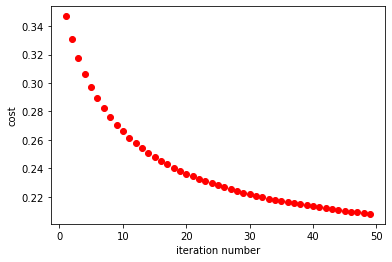

(array([[0.99834256],
        [2.03692229],
        [2.00803417]]),
 0.20802920952196224)

In [17]:
model.gradient_descent(x=x_train,y= y_train,w0 = w0,verbose=0,los='MLE',lr=.80851,plot_j=True,inplace=True,converLim=.0005,maxIter=200)       

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train.ravel());

In [19]:
print('sikit learn result:\n',clf.intercept_,clf.coef_[:,1:])
print()
print('my model result:\n',model.intercept_,model.coef_)

sikit learn result:
 [1.06043204] [[1.96276238 1.94646362]]

my model result:
 [[0.99834256]] [[2.03692229]
 [2.00803417]]


In [20]:
from sklearn.metrics import accuracy_score
sk_p = clf.predict(x_test)
model_p = model.Hyp(x=x_test).ravel()
for i in range(len(model_p)):
    if model_p[i]<.5:
        model_p[i]=0
    else:
        model_p[i]=1
print(accuracy_score(y_test,sk_p))
print(accuracy_score(y_test,model_p))

1.0
1.0
